In [107]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
from wordcloud import WordCloud 
import re
import spacy
from sentence_transformers import SentenceTransformer
import en_core_web_sm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

nlp = spacy.load("en_core_web_sm")


In [108]:
df = pd.read_csv("lifestyle_dataset.csv")
df.head()

,Age,Gender,Occupation,Height_cm,Weight_kg,Country,Archetype,DailyCalorieIntake,SleepHours,PhysicalActivity_min,...,ScreenTime_hrs,CommuteTime_hrs,TasksCompleted_day,ProductivityScore,StressLevel,MoodScore,MeditationTime_min,CodingHours_day,CodingProblems_day,DebuggingRatio
0,56,M,Manager,180.4,96.0,UK,Health Enthusiast,2602,8.2,64,...,4.1,0.0,5,6.1,4.8,9.1,21,1.3,1,0.33
1,46,M,Student,180.7,78.7,France,Student,2226,6.9,52,...,5.3,0.0,0,1.6,4.9,4.1,18,3.4,1,0.57
2,32,F,Unemployed,169.9,55.8,India,Student,1943,5.0,18,...,6.4,1.8,5,3.3,6.2,5.7,1,2.9,1,0.28
3,60,F,Teacher,172.1,64.6,Canada,Workaholic,1933,5.7,30,...,10.9,0.9,10,4.3,9.2,3.5,2,5.3,7,0.31
4,25,F,Student,156.5,53.5,Australia,Sedentary,1876,6.3,2,...,3.0,1.7,5,1.4,8.1,5.5,0,0.0,0,0.47


In [109]:
len(df)

10000

In [110]:
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 '.vscode',
 'car_data_analysis.ipynb',
 'co2emissions.ipynb',
 'combined_youtube_comments.csv',
 'CR7_youtube_comments.csv',
 'fitness',
 'GoldVsUSD analysis.ipynb',
 'Grain_Comodoties_Analysis_Modelling.ipynb',
 'lifestyle.ipynb',
 'lifestyle_dataset.csv',
 'README.md',
 'youtubeComments',
 'youtube_comments_2.csv',
 'youtube_comments_3.csv',
 'youtube_comments_4.csv',
 'youtube_comments_5.csv',
 'youtube_comments_6.csv',
 'youtube_comments_7.csv',
 'youtube_comments_8.csv']

In [111]:
files =  ['youtube_comments_2.csv',
 'youtube_comments_3.csv',
 'youtube_comments_4.csv',
 'youtube_comments_5.csv',
 'youtube_comments_6.csv',
 'youtube_comments_7.csv',
 'youtube_comments_8.csv']

In [112]:
df_combined = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

print(df_combined)

df_combined.to_csv("combined_youtube_comments.csv", index=False)

                                                Comment
0                                          lovely video
1                                   1000 Goals Sooon ️️
2            We love you so much GOAT  YOU are AMAZING 
3     Cristiano era el que tenía la carita más llena...
4     Ronaldo literally listened to all of the advic...
...                                                 ...
2597  Sin duda el mejor jugador para mí y yo sé que ...
2598                                       CR7, Ronaldo
2599                        CR7 CR7 CR7 CR7 CR7 CR7 CR7
2600                                       Love you cr7
2601                   Jr: Curl\n\nCristiano: POWERRRRR

[2602 rows x 1 columns]


In [113]:
df_combined.head()

,Comment
0,lovely video
1,1000 Goals Sooon ️️
2,We love you so much GOAT YOU are AMAZING
3,Cristiano era el que tenía la carita más llena...
4,Ronaldo literally listened to all of the advic...


In [114]:
total_text = [i for i in df_combined['Comment']]


In [118]:
n = 0 
for i in total_text: 
    if type(i) is not str:
        n+=1
        total_text.remove(i)
    else:
        continue

print(n)

0


In [119]:
total_text = ' '.join(total_text)

In [32]:
total_text

'lovely video 1000 Goals Sooon ️️ We love you so much GOAT  YOU are AMAZING  Cristiano era el que tenía la carita más llena de ilusión con la visita a Santa... Ronaldo literally listened to all of the advices that Jimmy gave . This is the amount of concentration and dedication he has for everything ... He doesn\'t just care about football, he cares about Family too. This man is the definition of GOAT  Merry Christmas to you too Cristiano!  Feliz Ano Novo pra essa família lindaSejam Abençoados  No man can beat this goat how he’s taking care of everything.  EL ALTISIMO LES BENDIGA  a ustedes y toda su familia This man is an excellent illustration of a self-sufficient individual who looks out for his family. Respect and affection  We hope you can bring and introduce Indonesia to Marcelo, there are many Marcelo fans here, there are many rumors about Marcelo being disappointed and not appreciated before the end of his playing time at the football club, here Marcelo will definitely feel valu

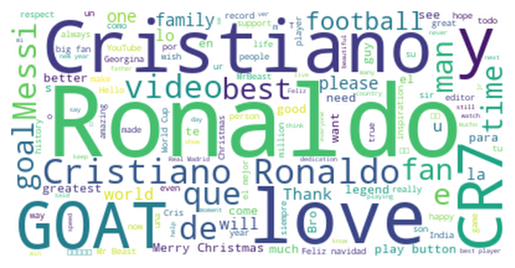

In [120]:
wordcloud = WordCloud(background_color='white').generate(total_text)

plt.figure()
plt.imshow(wordcloud, interpolation="bessel")
plt.axis("off")
plt.show()


In [121]:
def preprocess_text(text):
    if not isinstance(text, str): 
        return ""
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()  # Convert to lowercase
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(tokens)

df_combined["Cleaned_Comment"] = df_combined["Comment"].fillna("").apply(preprocess_text)

# Check the results
df_combined.head()

,Comment,Cleaned_Comment
0,lovely video,lovely video
1,1000 Goals Sooon ️️,goal sooon
2,We love you so much GOAT YOU are AMAZING,love goat amazing
3,Cristiano era el que tenía la carita más llena...,cristiano era el que tena la carita ms llena d...
4,Ronaldo literally listened to all of the advic...,ronaldo literally listen advice jimmy give c...


In [122]:
model = SentenceTransformer('all-MiniLM-L6-v2')  

df_combined['Embeddings'] = df_combined['Cleaned_Comment'].apply(lambda x: model.encode(x))

embeddings = list(df_combined['Embeddings'])

In [123]:

embeddings_array = np.array(embeddings)

num_clusters =2

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_combined['Cluster'] = kmeans.fit_predict(embeddings_array)

df_combined.head()


,Comment,Cleaned_Comment,Embeddings,Cluster
0,lovely video,lovely video,"[-0.032780953, -0.0044178963, 0.043443363, -0....",0
1,1000 Goals Sooon ️️,goal sooon,"[-0.075702965, 0.10198534, -0.07914541, -0.053...",0
2,We love you so much GOAT YOU are AMAZING,love goat amazing,"[0.028636895, -0.011252129, 0.022808636, -0.03...",0
3,Cristiano era el que tenía la carita más llena...,cristiano era el que tena la carita ms llena d...,"[0.0061589954, 0.053048626, -0.017108167, -0.0...",1
4,Ronaldo literally listened to all of the advic...,ronaldo literally listen advice jimmy give c...,"[0.034789644, 0.010895671, -0.046511106, -0.04...",1


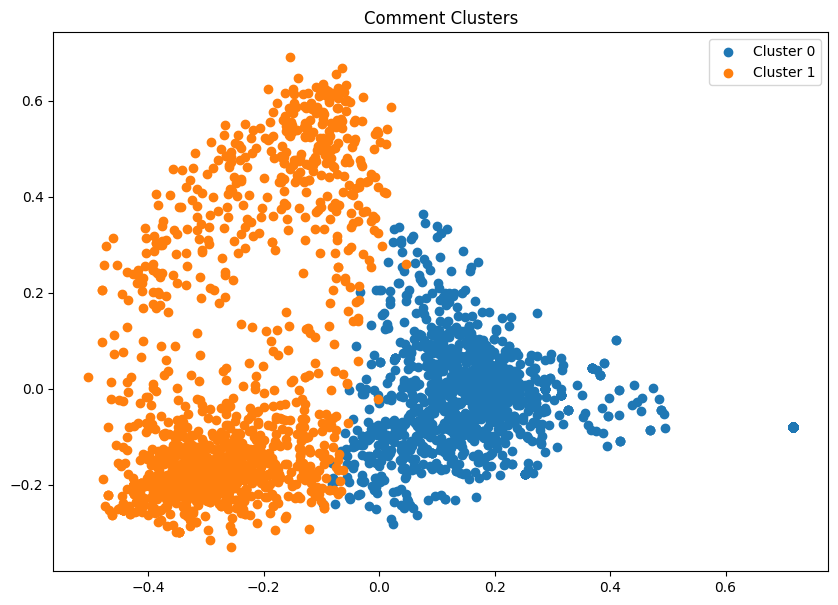

In [125]:

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_array)

plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    cluster_points = reduced_embeddings[df_combined['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Comment Clusters')
plt.legend()
plt.show()
